In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm


In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products__train.csv')
order = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [10]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
df = pd.concat((train, prior), axis=0, ignore_index=True, sort=False)

In [39]:
df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
order['days_since_prior_order'].fillna(order['days_since_prior_order'].mean(), inplace=True)

In [6]:
df = pd.concat((df, order), axis=0, ignore_index=True, sort=True)

In [42]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,11109.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,10246.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,49683.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,43633.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop(['user_id'], axis=1)

In [7]:
df.head()

,add_to_cart_order,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_id,order_number,product_id,reordered
0,1.0,NaN,NaN,NaN,NaN,1,NaN,49302.0,1.0
1,2.0,NaN,NaN,NaN,NaN,1,NaN,11109.0,1.0
2,3.0,NaN,NaN,NaN,NaN,1,NaN,10246.0,0.0
3,4.0,NaN,NaN,NaN,NaN,1,NaN,49683.0,0.0
4,5.0,NaN,NaN,NaN,NaN,1,NaN,43633.0,1.0


In [11]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [26]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [33]:
aisles.info() #134
products.info() #49688
departments.info() #21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [8]:
df = pd.concat((df, products), axis=0, ignore_index=True, sort=True)

In [9]:
df_reordered= df[df['reordered']==1]

In [10]:
df_reordered.head()

,add_to_cart_order,aisle_id,days_since_prior_order,department_id,eval_set,order_dow,order_hour_of_day,order_id,order_number,product_id,product_name,reordered
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,49302.0,NaN,1.0
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,11109.0,NaN,1.0
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,43633.0,NaN,1.0
7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,22035.0,NaN,1.0
9,2.0,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,19660.0,NaN,1.0


13.45201534134074

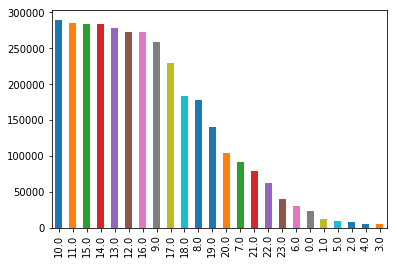

In [11]:
hours = df['order_hour_of_day'].dropna()
hours.value_counts().plot(kind='bar')
hours.mean()
#customer order mostly between 10 to 15, in average 13:45 

2.7762191095626734

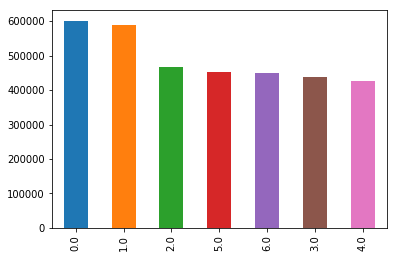

In [12]:
dow = df['order_dow'].dropna()
dow.value_counts().plot(kind='bar')
dow.mean()
# customer reorder within 2-3 weeks average but mostly btw within 1st week 

11.11483622685162

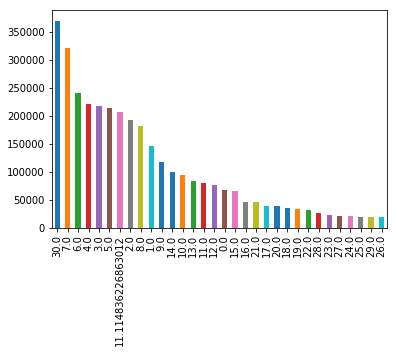

In [13]:
days = df['days_since_prior_order'].dropna()
days.value_counts().plot(kind='bar')
days.mean()
# most of customer took 30 days to reorder, in average it took 12 days 

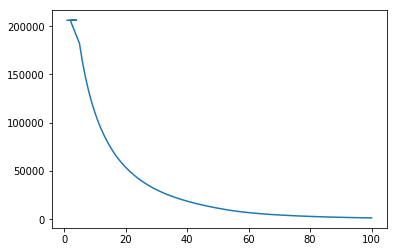

In [14]:
ordernum = df['order_number'].dropna()
ordernum.value_counts().plot()


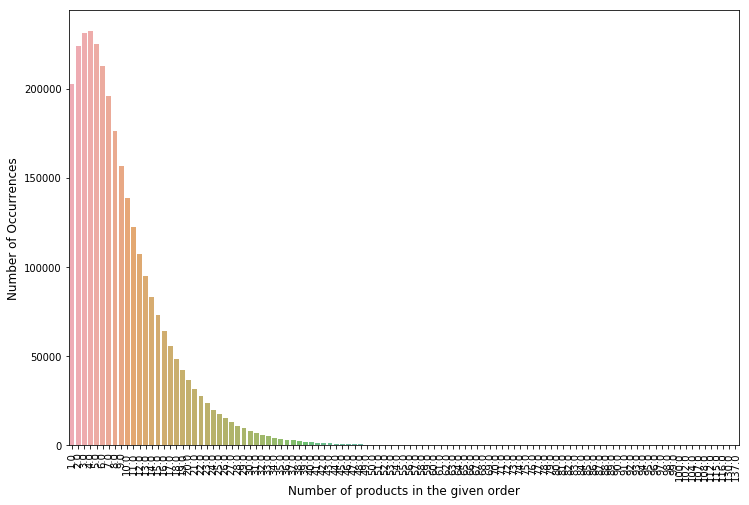

In [15]:
grouped_df = df_reordered.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
# customer orders mostly 5 products when they place order 

In [32]:
productname = df_reordered['product_id'].dropna()
productname = df_reordered['product_id'].value_counts().head()
productname

24852.0    415166
13176.0    329275
21137.0    214448
21903.0    194939
47209.0    176173
Name: product_id, dtype: int64

In [46]:
topsold = products[(products['product_id']==24852.0)]
topsold = topsold.append(products[(products['product_id']==13176.0)])
topsold = topsold.append(products[(products['product_id']==21137.0)])
topsold = topsold.append(products[(products['product_id']==21903.0)])
topsold = topsold.append(products[(products['product_id']==47209.0)])


,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4
13175,13176,Bag of Organic Bananas,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
47208,47209,Organic Hass Avocado,24,4


In [ ]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()